Below based on `preprocess.ipynb` by Mohsen Bagherimehrab, at Zapata repository

In [1]:
import pandas as pd
import ehm_dmrg.ehm_utils as ehm_utils
import numpy as np
import time
import matplotlib.pyplot as plt

/home/jtcantin/utoronto/ehm_dmrg/ehm_dmrg/env_ehm_dmrg/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
#Preprocessing
rawdata = pd.read_csv('combined_df.csv', index_col=None)
[column for column in rawdata.columns]

['hamiltonian_id',
 'num_orbitals',
 'num_electrons',
 'num_spin_orbitals',
 'two_S',
 'orbsym',
 'isym',
 'total_num_states',
 'log10_hilbert_space_size',
 'tbt_matrices_calc_time_s',
 'bandwidth_calc_time_s',
 'coulomb_matrix_bandwidth_upper',
 'coulomb_matrix_bandwidth_lower',
 'exchange_matrix_bandwidth_upper',
 'exchange_matrix_bandwidth_lower',
 'mean_field_matrix_bandwidth_upper',
 'mean_field_matrix_bandwidth_lower',
 'coulomb_calc_time_s',
 'coulomb_matrix_algebraic_connectivity',
 'coulomb_matrix_transitivity',
 'coulomb_matrix_edgeCount',
 'coulomb_matrix_graph_creation_time',
 'coulomb_matrix_algebraic_connectivity_calc_time_s',
 'coulomb_matrix_transitivity_calc_time_s',
 'coulomb_matrix_specA_min',
 'coulomb_matrix_specA_Q2',
 'coulomb_matrix_specA_max',
 'coulomb_matrix_specA_mean',
 'coulomb_matrix_specA_std',
 'coulomb_matrix_specA_coeff_variation',
 'coulomb_matrix_specA_power_spectral_entropy',
 'coulomb_matrix_specA_calc_time_s',
 'coulomb_matrix_specA_stat_calc_tim

In [3]:
# Before applying the preprocessing, we now reduced the raw dataset for one solver.
rawdata_coarse_bd = rawdata.drop(['total_loops_cpu_time_sec'], axis=1)
rawdata_coarse_bd = rawdata_coarse_bd.drop(['total_loops_wall_time_sec'], axis=1)
rawdata_coarse_bd = rawdata_coarse_bd.drop(['hamiltonian_id'], axis=1)
rawdata_coarse_bd = rawdata_coarse_bd.drop(['orbsym'], axis=1)
rawdata_coarse_bd

,num_orbitals,num_electrons,num_spin_orbitals,two_S,isym,total_num_states,log10_hilbert_space_size,tbt_matrices_calc_time_s,bandwidth_calc_time_s,coulomb_matrix_bandwidth_upper,...,density_hopping_tensor_sum_abs,tbt_density_hopping_calc_time_s,tbt_mean,tbt_std,tbt_max,tbt_min,tbt_coeff_variation,tbt_inv_coeff_variation,tbt_calc_time_s,coarse_bond_dimension
0,33,46,66,0,1,4.066117e+16,16.609180,0.000129,0.000069,32,...,427.329292,0.000234,-0.000181,0.008872,0.267286,-0.419490,-48.890471,-0.020454,0.004729,19
1,46,57,92,1,1,2.970221e+25,25.472789,0.000156,0.000029,45,...,675.364689,0.012556,-0.000110,0.006374,0.199710,-0.327631,-57.896224,-0.017272,0.625121,13
2,46,58,92,0,1,1.792375e+25,25.253429,0.000148,0.000029,45,...,643.901094,0.016808,-0.000105,0.006246,0.196475,-0.318972,-59.572611,-0.016786,0.452869,8
3,33,45,66,1,1,8.906733e+16,16.949718,0.000099,0.000029,32,...,445.456564,0.000227,-0.000208,0.009116,0.267021,-0.459342,-43.897176,-0.022781,0.004100,170
4,32,50,64,0,1,4.785570e+13,13.679934,0.000068,0.000026,31,...,400.407716,0.000229,-0.000267,0.010970,0.185329,-0.572850,-41.013888,-0.024382,0.003799,9
5,51,74,102,0,1,9.533095e+24,24.979234,0.000170,0.000031,50,...,861.175857,0.016061,-0.000084,0.005300,0.280269,-0.456726,-63.056685,-0.015859,0.525287,77
6,27,44,54,0,1,2.393071e+10,10.378956,0.000081,0.000032,26,...,325.756966,0.000171,-0.000382,0.013949,0.151781,-0.593228,-36.478773,-0.027413,0.001649,9
7,51,74,102,0,1,9.533095e+24,24.979234,0.000184,0.000031,50,...,983.389188,0.020848,-0.000083,0.005330,0.267025,-0.452306,-64.516594,-0.015500,0.465496,104
8,32,50,64,0,1,4.785570e+13,13.679934,0.000063,0.000026,31,...,445.499253,0.000245,-0.000281,0.010940,0.168178,-0.564789,-38.961989,-0.025666,0.004385,37
9,51,74,102,0,1,9.533095e+24,24.979234,0.000185,0.000031,50,...,978.289502,0.017098,-0.000081,0.005307,0.248773,-0.445743,-65.850445,-0.015186,0.669791,11


In [4]:
# We now apply the preprocessing

target = 'coarse_bond_dimension'

preproc_df_coarse_bd = ehm_utils.preprocess(rawdata_coarse_bd, target, normalize_target=True)
preproc_df_coarse_bd

,num_orbitals,num_electrons,num_spin_orbitals,two_S,total_num_states,log10_hilbert_space_size,coulomb_matrix_bandwidth_upper,coulomb_calc_time_s,coulomb_matrix_algebraic_connectivity,coulomb_matrix_edgeCount,...,tbt_abs_graph_mapping_specL_power_spectral_entropy,tbt_abs_graph_mapping_specR_max,tbt_abs_graph_mapping_specR_coeff_variation,tbt_abs_graph_mapping_specR_power_spectral_entropy,density_hopping_tensor_min,density_hopping_tensor_coeff_variation,density_hopping_tensor_sum_abs,tbt_coeff_variation,tbt_calc_time_s,coarse_bond_dimension
0,-0.660857,-8.658878e-01,-0.660857,-0.524531,-0.444610,-0.409529,-0.660857,0.240885,-0.976096,-0.723004,...,-1.058204,-1.121443,-0.694443,-0.562026,0.667360,0.772785,-0.713349,0.151460,-0.879365,-0.508060
1,0.646491,-3.058773e-16,0.646491,0.393398,0.510346,1.028708,0.646491,-0.286041,1.125918,0.584041,...,-1.551172,-1.367962,-1.082016,0.711382,1.577118,-0.124184,0.230252,-0.605088,1.212080,-0.623716
2,0.646491,7.871707e-02,0.646491,-0.524531,0.131657,0.993114,0.646491,3.418850,0.979665,0.584041,...,-1.589568,-1.365856,-1.103154,0.710340,1.662877,-0.116834,0.110555,-0.745917,0.631391,-0.720096
3,-0.660857,-9.446049e-01,-0.660857,0.393398,-0.444610,-0.354272,-0.660857,-0.272478,-0.792141,-0.723004,...,-1.017198,-1.156914,-0.894005,-0.564857,0.272663,0.781251,-0.644387,0.570933,-0.881486,2.402616
4,-0.761422,-5.510195e-01,-0.761422,-0.524531,-0.444610,-0.884838,-0.761422,-0.316949,-0.694127,-0.805951,...,0.916039,1.313912,0.832272,-0.682713,-0.851511,0.383483,-0.815766,0.813149,-0.882501,-0.700820
5,1.149317,1.338190e+00,1.149317,-0.524531,-0.138112,0.948622,1.149317,-0.355053,0.886860,1.199860,...,-0.409576,0.587934,-0.149753,1.088549,0.298578,-1.417223,0.937133,-1.038604,0.875524,0.609948
6,-1.264248,-1.023322e+00,-1.264248,-0.524531,-0.444610,-1.420465,-1.264248,-0.388455,-1.418325,-1.182983,...,1.206043,0.752508,0.978368,-1.349702,-1.053329,1.058479,-1.099760,1.194132,-0.889750,-0.700820
7,1.149317,1.338190e+00,1.149317,-0.524531,-0.138112,0.948622,1.149317,-0.350650,1.004491,1.199860,...,0.499274,-0.324188,-0.651717,1.071983,0.342350,-1.196556,1.402069,-1.161247,0.673960,1.130400
8,-0.761422,-5.510195e-01,-0.761422,-0.524531,-0.444610,-0.884838,-0.761422,-0.386004,-0.844081,-0.805951,...,1.282000,0.481375,0.958596,-0.707436,-0.771676,0.670096,-0.644225,0.985524,-0.880527,-0.161092
9,1.149317,1.338190e+00,1.149317,-0.524531,-0.138112,0.948622,1.149317,-0.062296,0.998928,1.199860,...,0.714999,-0.021533,-0.473741,1.072400,0.407349,-1.297618,1.382668,-1.273300,1.362671,-0.662268


In [5]:
[column for column in preproc_df_coarse_bd.columns]

['num_orbitals',
 'num_electrons',
 'num_spin_orbitals',
 'two_S',
 'total_num_states',
 'log10_hilbert_space_size',
 'coulomb_matrix_bandwidth_upper',
 'coulomb_calc_time_s',
 'coulomb_matrix_algebraic_connectivity',
 'coulomb_matrix_edgeCount',
 'coulomb_matrix_algebraic_connectivity_calc_time_s',
 'coulomb_matrix_specA_min',
 'coulomb_matrix_specA_max',
 'coulomb_matrix_specA_std',
 'coulomb_matrix_specA_coeff_variation',
 'coulomb_matrix_specA_power_spectral_entropy',
 'coulomb_matrix_specL_min',
 'coulomb_matrix_specL_Q2',
 'coulomb_matrix_specL_mean',
 'coulomb_matrix_specL_std',
 'coulomb_matrix_specL_power_spectral_entropy',
 'coulomb_matrix_specR_min',
 'coulomb_matrix_specR_coeff_variation',
 'coulomb_matrix_specR_power_spectral_entropy',
 'exchange_calc_time_s',
 'exchange_matrix_algebraic_connectivity_calc_time_s',
 'exchange_matrix_specA_coeff_variation',
 'exchange_matrix_specA_power_spectral_entropy',
 'exchange_matrix_specL_Q2',
 'exchange_matrix_specL_mean',
 'exchange

In [6]:
features_to_keep =[
##Positive correlation for below
"log10_hilbert_space_size",
"num_orbitals",
"coulomb_matrix_bandwidth_upper",
"coulomb_matrix_algebraic_connectivity",
"coulomb_matrix_edgeCount",
"coulomb_matrix_specA_max",
"coulomb_matrix_specA_power_spectral_entropy",
"coulomb_matrix_specR_power_spectral_entropy",
"exchange_matrix_specA_power_spectral_entropy",
"exchange_matrix_specR_min",
"exchange_matrix_specR_power_spectral_entropy",
"mean_field_calc_time_s",
"mean_field_matrix_algebraic_connectivity",
"mean_field_matrix_algebraic_connectivity_calc_time_s",
"mean_field_matrix_specA_max",
"mean_field_matrix_specA_power_spectral_entropy",
"mean_field_matrix_specL_std", #Important for DT?
"mean_field_matrix_specR_power_spectral_entropy",
"tbt_graph_mapping_calc_time_s",
"tbt_abs_graph_mapping_calc_time_s",
"tbt_abs_graph_mapping_algebraic_connectivity", # Very unique, split correlation, strong
"tbt_abs_graph_mapping_algebraic_connectivity_calc_time_s",
"tbt_abs_graph_mapping_algebraic_connectivity_calc_time_s",
"tbt_abs_graph_mapping_specA_min",
"tbt_abs_graph_mapping_specA_Q2",
"tbt_abs_graph_mapping_specA_max",
"tbt_abs_graph_mapping_specA_mean", # Unique, some correlation splitting
"tbt_abs_graph_mapping_specA_std",
"tbt_abs_graph_mapping_specA_coeff_variation",
"tbt_abs_graph_mapping_specA_power_spectral_entropy",
"tbt_abs_graph_mapping_specL_max",
"tbt_abs_graph_mapping_specL_std",
"tbt_abs_graph_mapping_specR_power_spectral_entropy",
"density_hopping_tensor_min",
"density_hopping_tensor_sum_abs",
## Negative correlation for below
"coulomb_matrix_specL_min",
"coulomb_matrix_specL_Q2",
"coulomb_matrix_specL_mean",
"coulomb_matrix_specR_min",
"exchange_matrix_specL_coeff_variation",
"exchange_matrix_specL_power_spectral_entropy",
"exchange_matrix_specR_max", #Important for DT?
"exchange_matrix_specR_std",
"mean_field_matrix_specA_min", #Important for DT?
"mean_field_matrix_specL_min",
"mean_field_matrix_specL_Q2",
"mean_field_matrix_specL_mean",
"mean_field_matrix_specR_min",
"tbt_abs_graph_mapping_specL_coeff_variation",
"tbt_abs_graph_mapping_specL_power_spectral_entropy",
"tbt_abs_graph_mapping_specR_max",
"tbt_abs_graph_mapping_specR_coeff_variation",
"density_hopping_tensor_coeff_variation",
"tbt_coeff_variation",
    
]

In [7]:
# mlData = preproc_df_coarse_bd
# Hardness or target
target_perf_metric = 'coarse_bond_dimension'

mlData = ehm_utils.prune_features(preproc_df=preproc_df_coarse_bd, to_keep=features_to_keep, target=target_perf_metric)

# problem features
features = list(mlData.drop(target_perf_metric, axis = 1, inplace = False))


# train + test parts
X = mlData.drop([target_perf_metric], axis = 1, inplace = False)
target_values = mlData[target_perf_metric]
# y = np.log(target_values)
y = target_values
X_train, X_test, y_train, y_test = ehm_utils.train_test_split(X, y, test_size = 0.3)

In [8]:
EHMs_bd_coarse = ehm_utils.construct_EHMs(X_train, X_test, y_train, y_test)

/home/jtcantin/utoronto/ehm_dmrg/ehm_dmrg/env_ehm_dmrg/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jtcantin/utoronto/ehm_dmrg/ehm_dmrg/env_ehm_dmrg/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jtcantin/utoronto/ehm_dmrg/ehm_dmrg/env_ehm_dmrg/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/home/jtcantin/utoronto/ehm_dmrg/ehm_dmrg/env_ehm_dmrg/lib/python3.10/site-packages/skle

In [9]:
ehm_utils.get_scores(EHMs_bd_coarse)

LINEAR SCORE: 
RMS  =   0.7630875121890539
PCC  =   0.6026297428770666
R2  =   -1.1498640993293439
------------------------------------------

RF SCORE: 
RMS  =   1.0372074376086904
PCC  =   0.3413841607273008
R2  =   -2.9718565902107104
------------------------------------------

SVR SCORE: 
RMS  =   0.9155049962218619
PCC  =   0.3944719709173668
R2  =   -2.094452011191787
------------------------------------------

DT SCORE: 
RMS  =   0.9080204817814531
PCC  =   0.05433259032680848
R2  =   -2.044062774363476
------------------------------------------

NN SCORE: 
RMS  =   0.9925227671660658
PCC  =   0.6429825240620387
R2  =   -2.636999739503215
------------------------------------------

GAUSSIAN PROCESS SCORE: 
RMS  =   0.6708230692400047
PCC  =   0.04305831385169728
R2  =   -0.6614156353971246
------------------------------------------



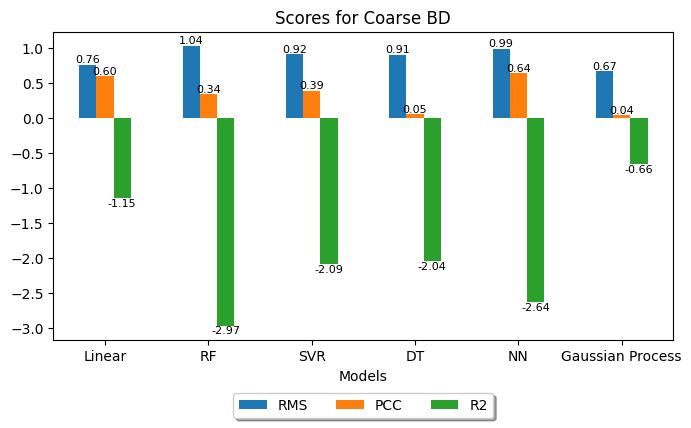

In [10]:
ehm_utils.scores_graph(EHMs_bd_coarse, plot_title = 'Scores for Coarse BD')

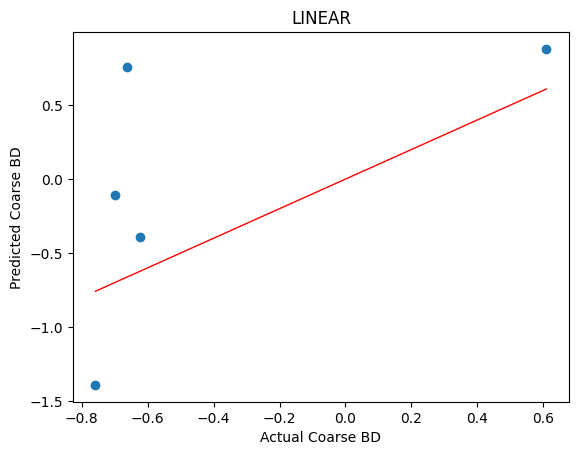

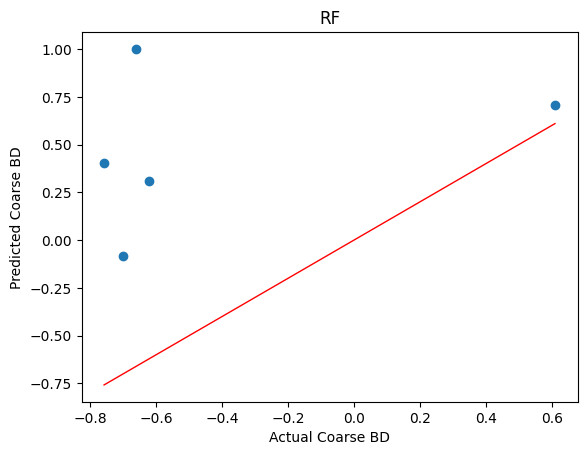

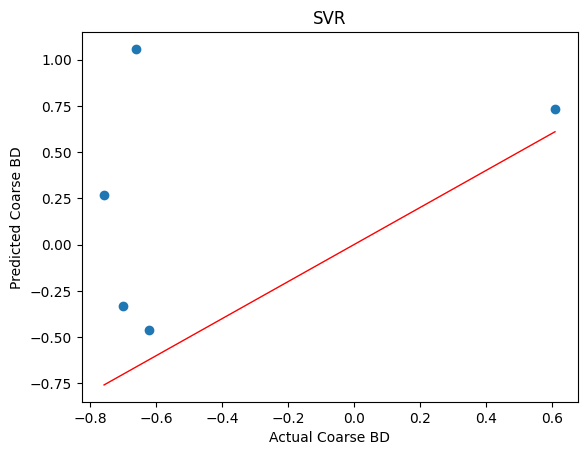

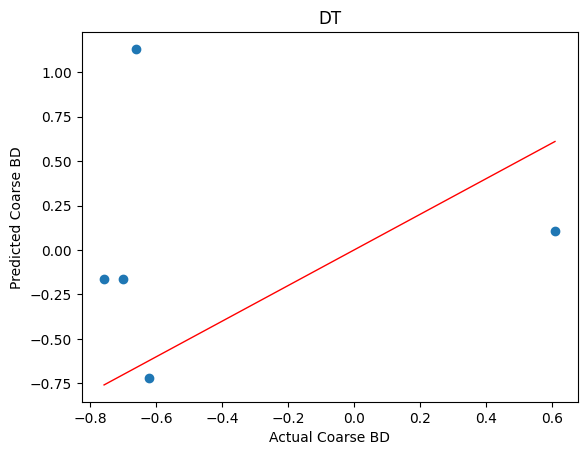

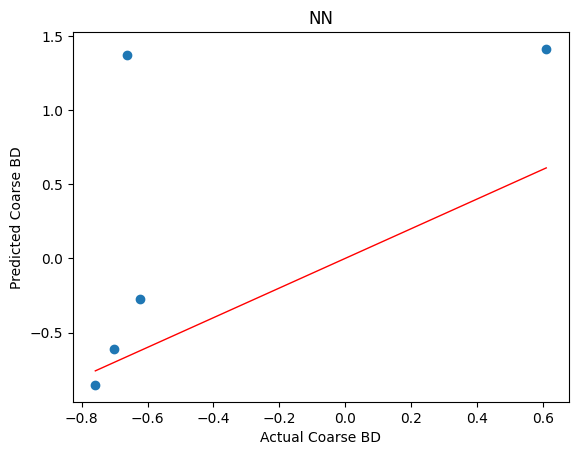

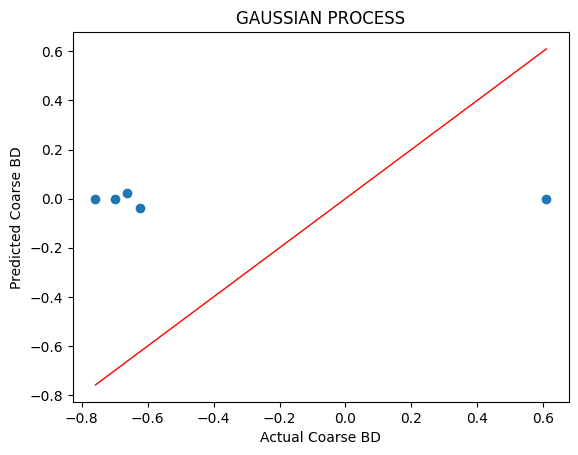

In [11]:
actual_axis_label = 'Actual Coarse BD'
predicted_axis_label = 'Predicted Coarse BD'


ehm_utils.plot_predicted_vs_actual(EHMs_bd_coarse, y_test, actual_axis_label, predicted_axis_label)

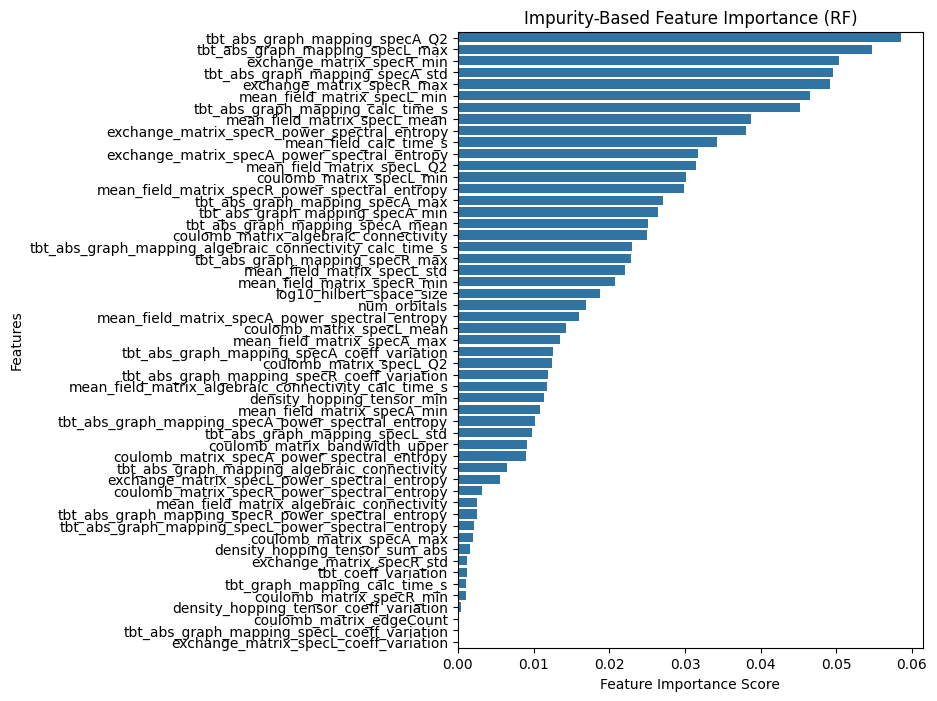

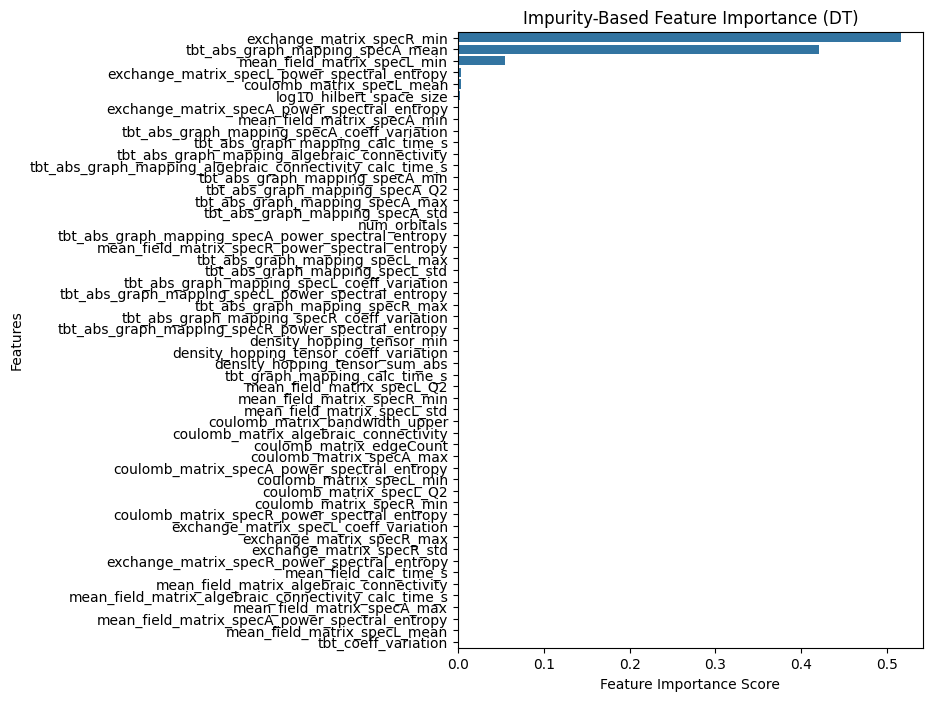

1.4040029048919678

In [12]:
start = time.time()

ehm_utils.feature_importance_impurity(EHMs_bd_coarse,features)

feature_importance_impurity_Conc_time = time.time() - start
feature_importance_impurity_Conc_time

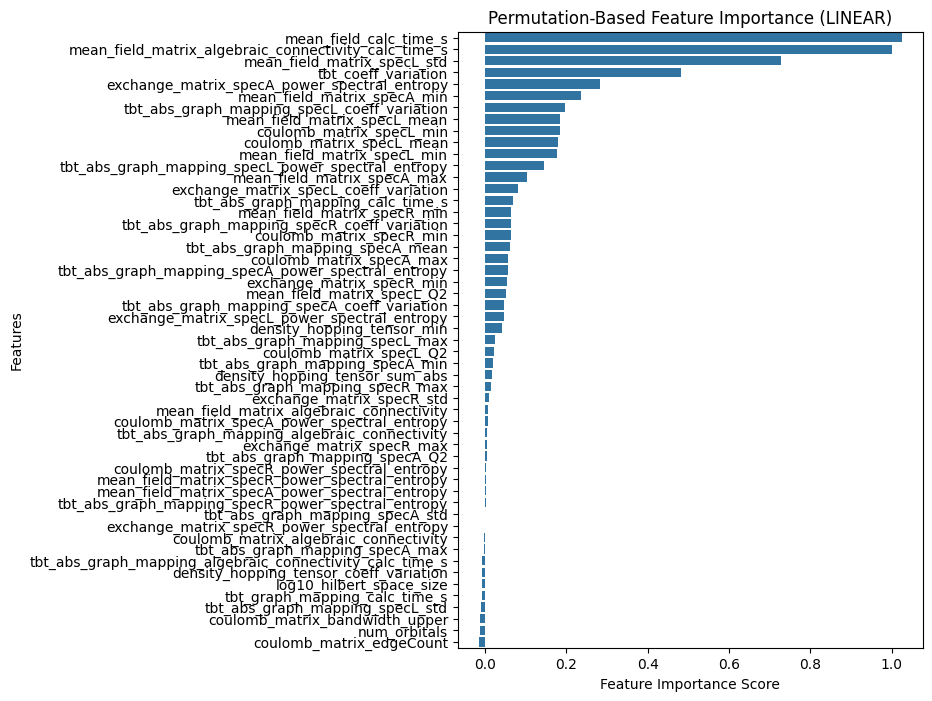

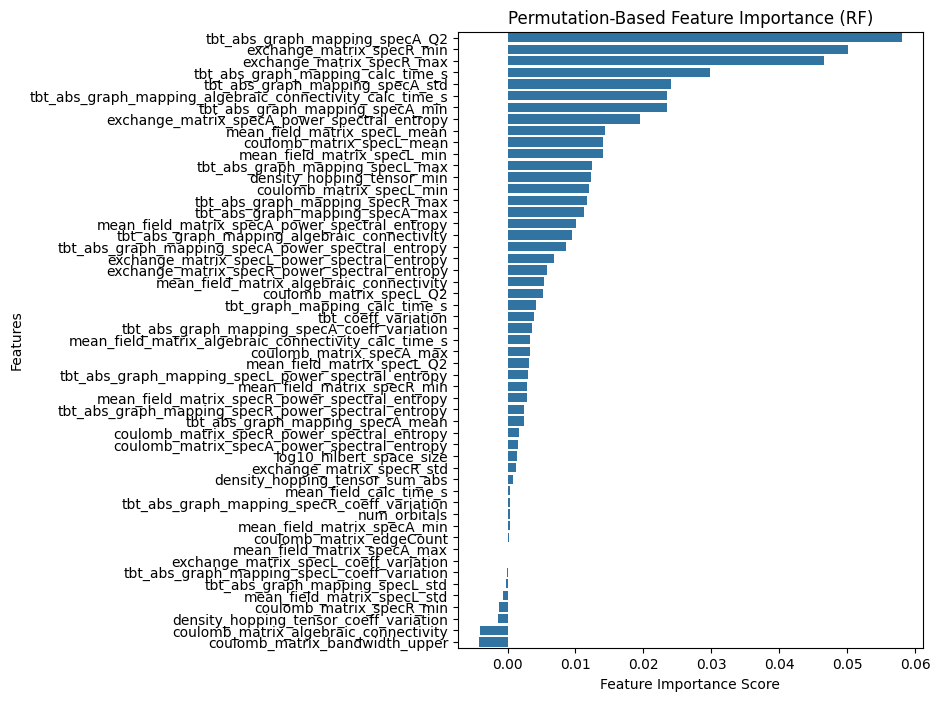

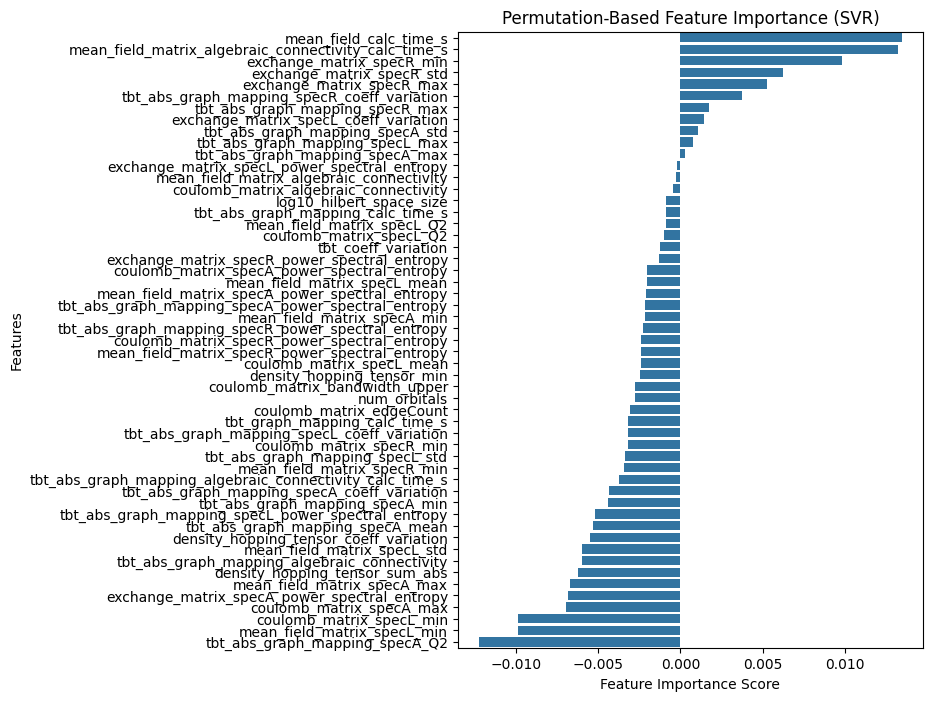

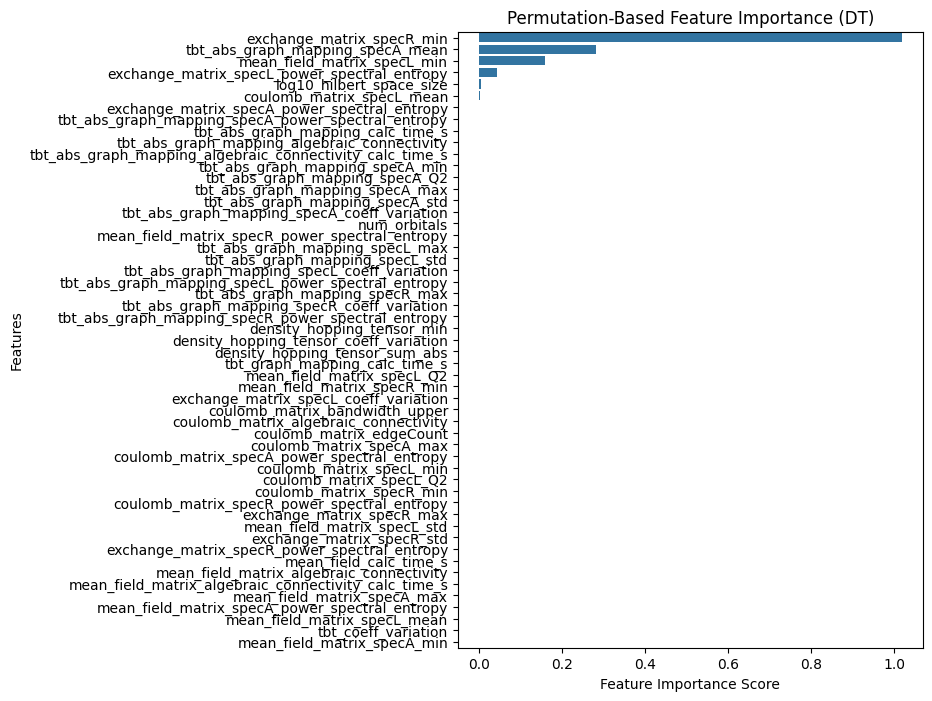

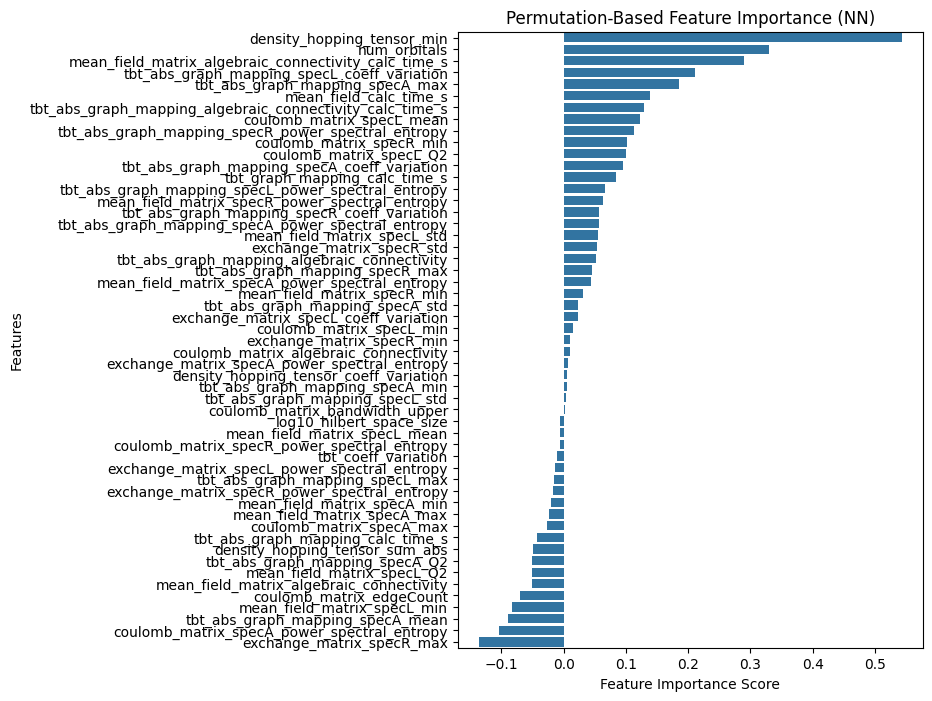

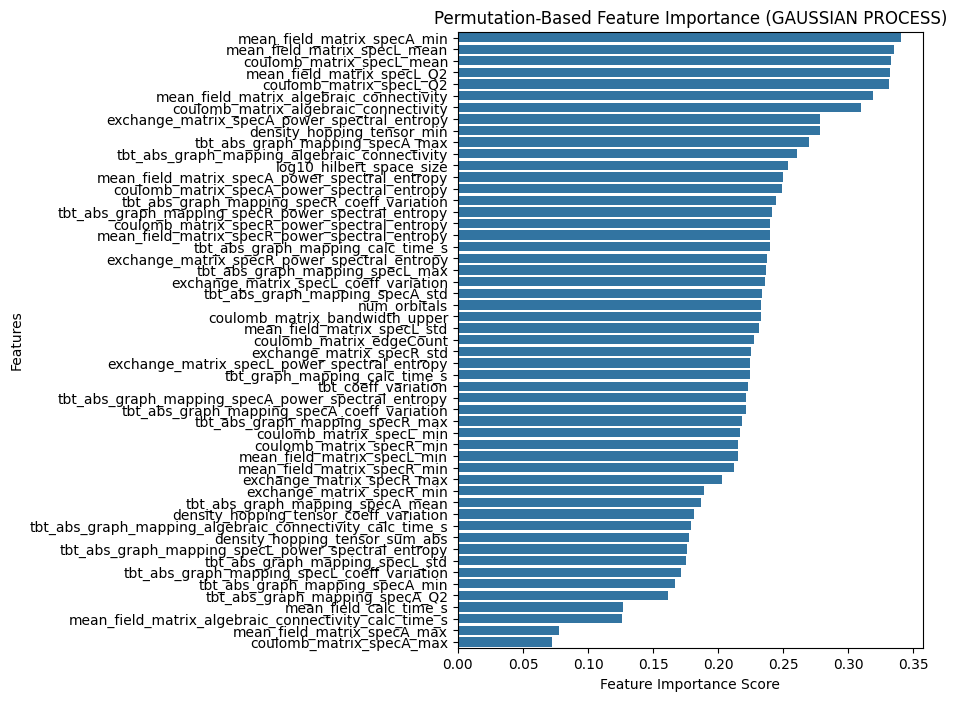

9.241750001907349

In [13]:
start = time.time()

ehm_utils.feature_importance_permutation(EHMs_bd_coarse,features, X, y)

feature_importance_permutation_Conc_time = time.time() - start
feature_importance_permutation_Conc_time

<Axes: xlabel='log10_hilbert_space_size', ylabel='tbt_abs_graph_mapping_algebraic_connectivity'>

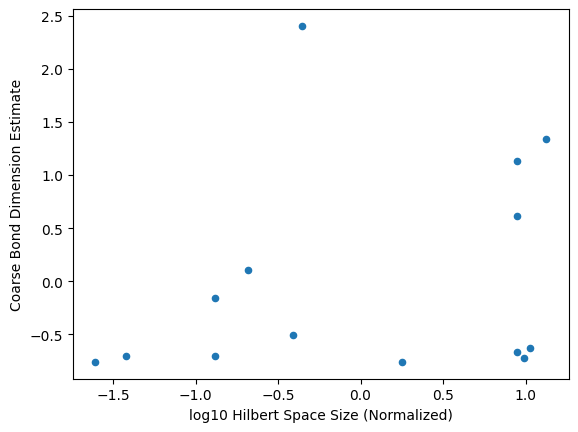

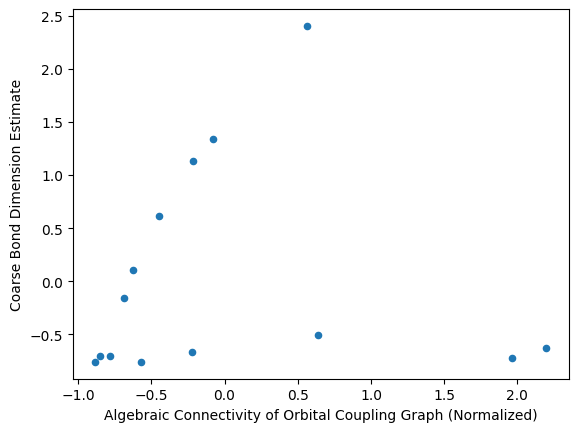

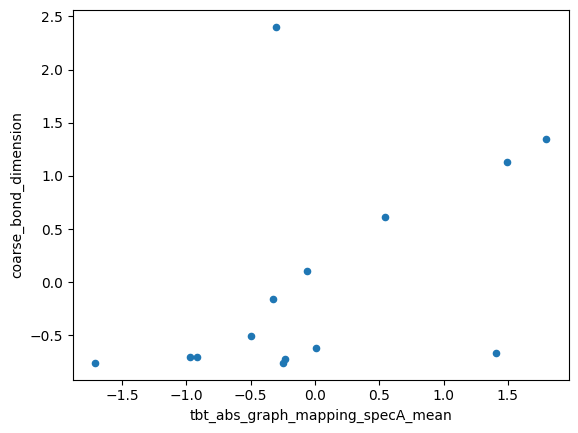

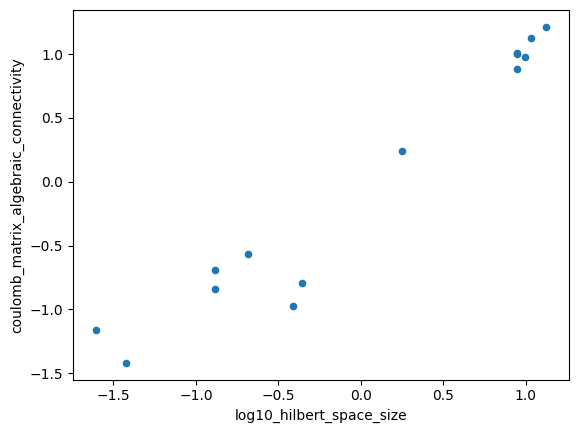

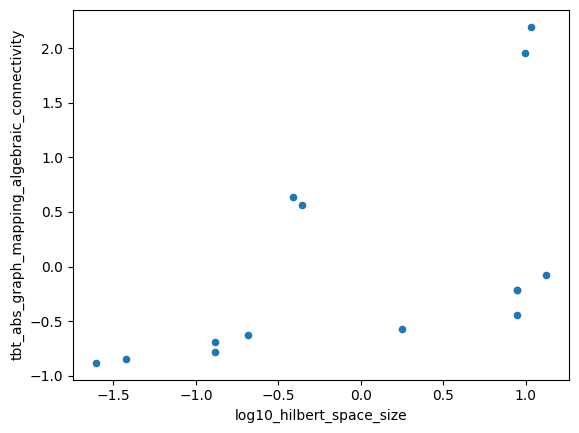

In [15]:
preproc_df_coarse_bd.plot(x='log10_hilbert_space_size', y='coarse_bond_dimension', kind='scatter')
plt.xlabel('log10 Hilbert Space Size (Normalized)')
plt.ylabel('Coarse Bond Dimension Estimate')
preproc_df_coarse_bd.plot(x='tbt_abs_graph_mapping_algebraic_connectivity', y='coarse_bond_dimension', kind='scatter')
plt.xlabel('Algebraic Connectivity of Orbital Coupling Graph (Normalized)')
plt.ylabel('Coarse Bond Dimension Estimate')
preproc_df_coarse_bd.plot(x='tbt_abs_graph_mapping_specA_mean', y='coarse_bond_dimension', kind='scatter')
preproc_df_coarse_bd.plot(x='log10_hilbert_space_size', y='coulomb_matrix_algebraic_connectivity', kind='scatter')
preproc_df_coarse_bd.plot(x='log10_hilbert_space_size', y='tbt_abs_graph_mapping_algebraic_connectivity', kind='scatter')

# Pos
# log10_hilbert_space_size
# num_orbitals
# coulomb_matrix_bandwidth_upper
# coulomb_matrix_algebraic_connectivity
# coulomb_matrix_edgeCount
# coulomb_matrix_specA_max
# coulomb_matrix_specA_power_spectral_entropy
# coulomb_matrix_specR_power_spectral_entropy
# exchange_matrix_specA_power_spectral_entropy
# exchange_matrix_specR_min
# exchange_matrix_specR_power_spectral_entropy
# mean_field_calc_time_s
# mean_field_matrix_algebraic_connectivity
# mean_field_matrix_algebraic_connectivity_calc_time_s
# mean_field_matrix_specA_max
# mean_field_matrix_specA_power_spectral_entropy
# mean_field_matrix_specL_std
# mean_field_matrix_specR_power_spectral_entropy
# tbt_graph_mapping_calc_time_s
# tbt_abs_graph_mapping_calc_time_s
# tbt_abs_graph_mapping_algebraic_connectivity ***
# tbt_abs_graph_mapping_algebraic_connectivity_calc_time_s
# tbt_abs_graph_mapping_algebraic_connectivity_calc_time_s
# tbt_abs_graph_mapping_specA_min
# tbt_abs_graph_mapping_specA_Q2
# tbt_abs_graph_mapping_specA_max
# tbt_abs_graph_mapping_specA_mean **
# tbt_abs_graph_mapping_specA_std
# tbt_abs_graph_mapping_specA_coeff_variation
# tbt_abs_graph_mapping_specA_power_spectral_entropy
# tbt_abs_graph_mapping_specL_max
# tbt_abs_graph_mapping_specL_std
# tbt_abs_graph_mapping_specR_power_spectral_entropy
# density_hopping_tensor_min
# density_hopping_tensor_sum_abs

#Neg
# coulomb_matrix_specL_min
# coulomb_matrix_specL_Q2
# coulomb_matrix_specL_mean
# coulomb_matrix_specR_min
# exchange_matrix_specL_coeff_variation
# exchange_matrix_specL_power_spectral_entropy
# exchange_matrix_specR_max
# exchange_matrix_specR_std
# mean_field_matrix_specA_min
# mean_field_matrix_specL_min
# mean_field_matrix_specL_Q2
# mean_field_matrix_specL_mean
# mean_field_matrix_specR_min
# tbt_abs_graph_mapping_specL_coeff_variation
# tbt_abs_graph_mapping_specL_power_spectral_entropy
# tbt_abs_graph_mapping_specR_max
# tbt_abs_graph_mapping_specR_coeff_variation
# density_hopping_tensor_coeff_variation
# tbt_coeff_variation


